# Подготовка модели распознавания рукописных букв и цифр

Вам предстоит самостоятельно обучить модель для задачи распознавания рукописных букв и цифр с помощью датасета `emnist`. Результатом должна быть обученная модель, сохранённая в файл `model.pkl`.

Можете воспользоваться предложенным порядком действий и подсказками из этого ноутбука или подойти к решению задачи самостоятельно и написать всё с нуля. То же касается и процесса упаковки модели в сервис для распознавания самостоятельно написанных символов.

В этом ноутбуке комментариями и символами `...` отмечены места для вашего кода.

Перед отправкой решения убедитесь, что все ячейки ноутбука выполняются последовательно без ошибок, если запустить `Kernel -> Restart & Run All`.

Успехов!

### 1. Установите и импортируйте необходимые библиотеки

In [1]:
!pip install emnist
# your pip installs here

In [2]:
import os
import pickle
import emnist
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# your imports here

### 2. Загрузите датасет и проанализируйте его

Датасет в качестве лейблов (или таргетов) содержит числа от 0 до 46. Каждому числу соответствует ASCII-код некоторого символа. Пары «лейбл — код» хранятся в файле `emnist-balanced-mapping.txt`.
Выведите на экран количество семплов в каждом сплите датасета и размер изображений. Также для каждого лейбла выведите соответствующий ему символ и количество тренировочных семплов, приходящееся на него.
Посмотрите на несколько примеров изображений.

_Подсказка: чтобы получить символ из ASCII-кода, нужно воспользоваться функцией_ `chr()`. _Для вашего удобства можно построить словарь_ (`dict`) _соответствий._

In [3]:
images_train, labels_train = emnist.extract_training_samples('balanced')
images_test, labels_test = emnist.extract_test_samples('balanced')

In [4]:
labels_train

array([45, 36, 43, ..., 23, 31,  8], dtype=uint8)

In [5]:
# your code here
print(f'Train: {len(images_train)} samples')
print(f'Test: {len(images_test)} samples')
print(f'Image size: {images_train[0].shape}')

Train: 112800 samples
Test: 18800 samples
Image size: (28, 28)


In [6]:
# label, соответствующий ему символ и количество тренировочных семплов, приходящееся на него
def labels_symbols(labels_train):    
    lbls = dict()    
    for item in labels_train:
        item_str = str(item)+" = "+str(chr(item))
        if item_str in lbls:
            lbls[item_str] += 1
        else:
            lbls[item_str] = 1
    print(f'Training data contains the following lables = symbols : cnt')
    return lbls

labels_symbols(labels_train)

Training data contains the following lables = symbols : cnt


{'45 = -': 2400,
 '36 = $': 2400,
 '43 = +': 2400,
 '15 = \x0f': 2400,
 '4 = \x04': 2400,
 '42 = *': 2400,
 '26 = \x1a': 2400,
 '32 =  ': 2400,
 '20 = \x14': 2400,
 '1 = \x01': 2400,
 '46 = .': 2400,
 '13 = \r': 2400,
 '24 = \x18': 2400,
 '12 = \x0c': 2400,
 '5 = \x05': 2400,
 '17 = \x11': 2400,
 '3 = \x03': 2400,
 '40 = (': 2400,
 '14 = \x0e': 2400,
 '44 = ,': 2400,
 '19 = \x13': 2400,
 '29 = \x1d': 2400,
 '25 = \x19': 2400,
 '35 = #': 2400,
 '28 = \x1c': 2400,
 '23 = \x17': 2400,
 '22 = \x16': 2400,
 '34 = "': 2400,
 '9 = \t': 2400,
 '30 = \x1e': 2400,
 '38 = &': 2400,
 "39 = '": 2400,
 '37 = %': 2400,
 '31 = \x1f': 2400,
 '16 = \x10': 2400,
 '7 = \x07': 2400,
 '2 = \x02': 2400,
 '8 = \x08': 2400,
 '10 = \n': 2400,
 '6 = \x06': 2400,
 '27 = \x1b': 2400,
 '33 = !': 2400,
 '11 = \x0b': 2400,
 '18 = \x12': 2400,
 '41 = )': 2400,
 '0 = \x00': 2400,
 '21 = \x15': 2400}

In [7]:
labels_train[1]

36

In [8]:
for i in range(112800):
    if labels_train[i] == 43:
        print(i)
        break

2


In [9]:
with open('im.txt', 'w') as f:
    for i in range(28):
        string = ''
        for j in images_train[2][i]:
            string = string + '%4d' % j
        f.write('\n')
        f.write(string)

In [10]:
for n in range(3):
    for y in range(27):
        for x in range(27):
            print("%5d" % images_train[n][y][x], end='')
        print('\n')
    print('\n')

    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0

    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0

    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0

    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0

    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0

    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0

    0    0    0    0    2    4    4    0    0    0    0    0    0    0    2    4    4    4    4    4    4    4    4    0    0    0    0

    0    0    1    8   77  124  114   45 

### 3. Подготовьте датасет для обучения и валидации

_Подсказка: чтобы вытянуть изображения в вектор, понадобится метод_ `reshape` _из библиотеки_ `numpy`.

In [11]:
X_train = images_train.reshape(len(images_train), 1, len(images_train[0])*len(images_train[0][0]))[:, 0, :]
y_train = labels_train
X_test = images_test.reshape(len(images_test), 1, len(images_test[0])*len(images_test[0][0]))[:, 0, :]
y_test = labels_test

print('Train:', X_train.shape)
print('Test:', X_test.shape)

Train: (112800, 784)
Test: (18800, 784)


### 4. Выберите модель, обучите её, протестируйте и сохраните

Выведите на экран точность вашей модели. Выведите и проанализируйте матрицу ошибок. Какие два символа она чаще всего путает? На каком символе модель чаще всего ошибается?

In [9]:
lr = LogisticRegression(random_state=25)
lr.fit(X_train, y_train)

/home/oleg/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,25
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [71]:
lr.predict(X_test)

array([ 3, 39,  9, ...,  1, 26, 33], dtype=uint8)

In [16]:
z = np.zeros(784)

In [18]:
z.reshape(1, 784)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [10]:
lr.predict(X_test[0])

ValueError: Expected 2D array, got 1D array instead:
array=[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   7  32
  32   5   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   1  35  90 202 190  59   7   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  23 159
 218 253 249 207  78   3   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0  18 126 234 251 252 251 251 176  47   5   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38
 214 253 252 191 148 236 247 195  47  10   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   7  95 234 251 242 116  45 217 254 247
 163  91   7   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  46 207 251 189 132  32  38 217 254 254 243 202  32   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   2  82 232 250 145  64   7  37 217
 254 255 249 215  37   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   4 125 249 250 129  41  10  64 222 254 254 245 204  32   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   4 127 250 252 191 146 140
 209 249 254 254 220 139   9   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   4 113 242 253 250 247 247 250 254 254 247 159  77   2   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0  32 126 202 173
 152 159 147 236 254 222  52  11   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   8  32  21  13  16  44 218 254 215  37   4
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   7  95 234 251 170  21   2   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0  46 207 253 233  84
   3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   4 115 245 254 204  34   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   8  36 177 252 250
 139   9   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0  33  91 221 254 243 115   4   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   7  19  19   1   0   0   6 115 203 253
 247 164  33   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2
  76 151 156  36   5  11  80 189 235 254 222  52   1   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   4 125 215 245 177 129 141 220 251
 254 251 201  32   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   4 114 203 253 252 250 250 254 254 250 187  79   7   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0  45 121 213 217 217 217
 217 203 170  67   4   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   5  18  37  37  37  37  37  32  21   2   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [79]:
cm = confusion_matrix(y_test, lr.predict(X_test))

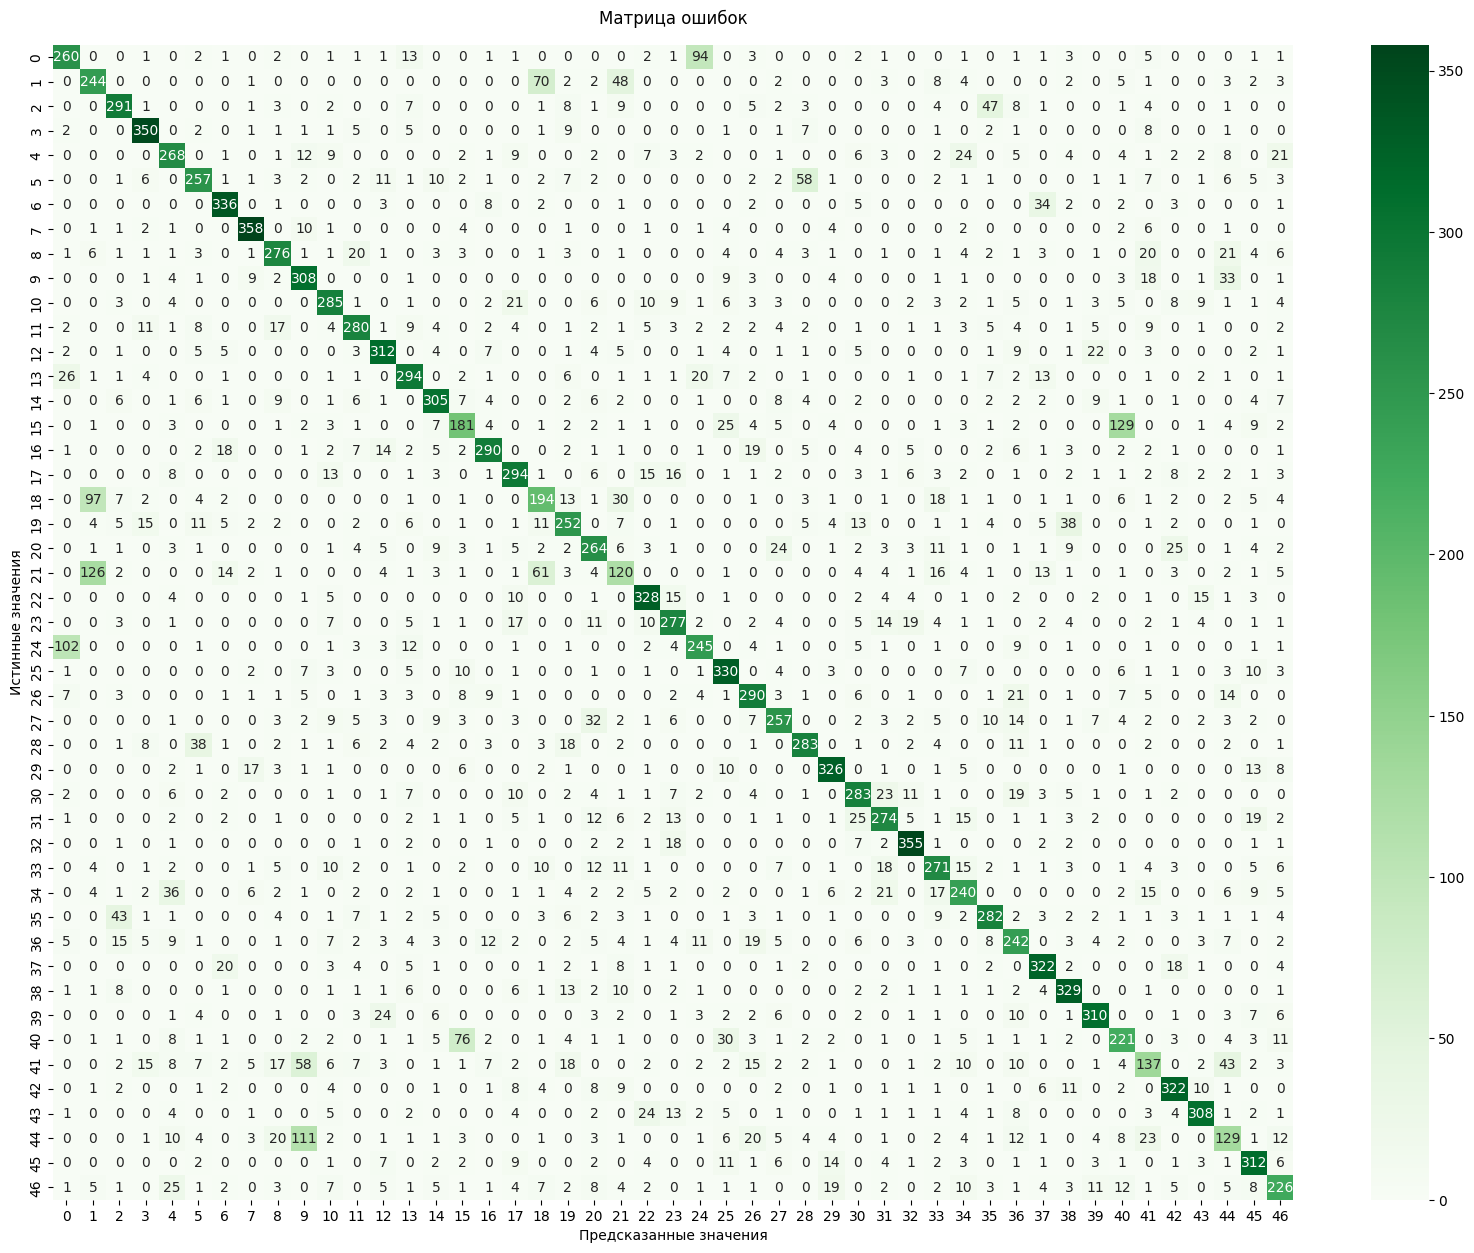

In [97]:
# Построение тепловой карты
plt.figure(figsize=(20, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', annot_kws={'fontsize': 10})
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')
plt.title('Матрица ошибок', pad=15)
plt.show()

In [98]:
# Выводы: 
#1 модель чаще всего путает ошибается на цифре 21, так как у нее меньше всего правильных совпадений из всех.
#2 модель чаще всего путает цифры 15 с 40 и 21 с 1, так как по ним самое большое количество ошибок.

In [99]:
# точность многоклассовой модели
roc_auc_score(y_test, lr.predict_proba(X_test), multi_class='ovo')

0.9750698369565217

In [101]:
with open(os.path.join('myapp', 'model.pkl'),'wb') as f:
    pickle.dump(lr, f)